In [2]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import tensorflow as tf
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.preprocessing.image import load_img, img_to_array
# from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
from tensorflow import keras

In [4]:
import torchvision

In [5]:
# load the training and test sets and create all 4 classes
print(os.getcwd())
# get stuff in BrainTumorData
# which has Testing and Training
labels = []

C:\Users\hallj\Downloads


In [16]:
data_directory = str(os.getcwd()) + '\BrainTumorData'

# display contents of data directory
print(os.listdir(data_directory))

class_labels = []

for item in os.listdir(data_directory):
    print(item)
    class_labels = os.listdir(data_directory + '\\' + item)

print(class_labels)

# before taking out validation set
#X_train_full
#y_train_full

['Testing', 'Training']
Testing
Training
['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


In [18]:
print(data_directory)

C:\Users\gmsee\CompHealthProject\BrainTumorData


In [ ]:
curr_dir = data_directory + '\Testing\\'

In [41]:
# we want to do this after pullig out validation
X_train_full = keras.preprocessing.image_dataset_from_directory(directory=data_directory+'\Training',
                                                        labels='inferred',
                                                        label_mode='categorical', 
                                                        class_names=class_labels, 
                                                        color_mode='grayscale',
                                                        batch_size=32,
                                                        image_size=(500, 500), shuffle=True, 
                                                        seed=None)
#X_train_full
three_imgs = X_train_full[:3]
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_train_full):
    #thingnumpy = thing.numpy()
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap='binary', interpolation='nearest')
    plt.axies('off')
    plt.title(class_names[index])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Found 2870 files belonging to 4 classes.


TypeError: 'BatchDataset' object is not subscriptable

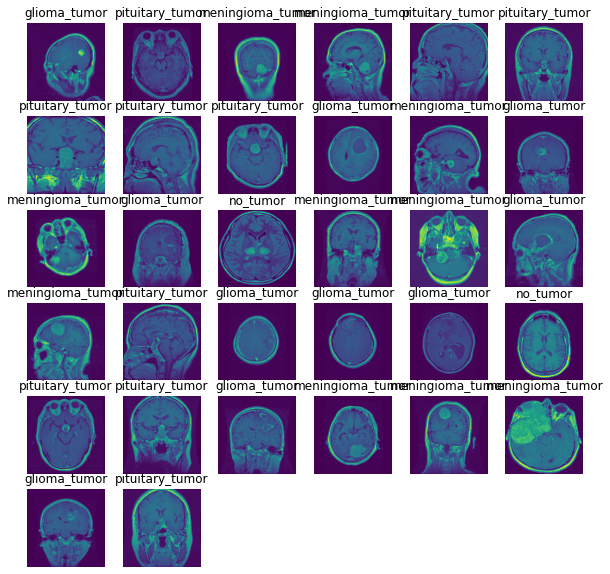

In [55]:
#poo = list(X_train_full)
#poo[0:5]

# not getting the right labels

plt.figure(figsize=(10,10))
#class_names = X_train_full.class_names
for images, labels in X_train_full.take(1):
    #print(labels)
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        #print(list(np.asarray(labels[i])))
        label_index = list(np.asarray(labels[i])).index(1)
        #label_index = np.asarray(labels[i]).where(1)
        label = class_labels[label_index]
        plt.title(label)
        plt.axis('off')

In [ ]:
# we want to do this after pullig out validation
X_train_full = keras.utils.image_dataset_from_directory(directory=data_directory+'\Training',
                                                        labels='inferred',
                                                        label_mode='categorical', 
                                                        class_names=labels, 
                                                        color_mode='grayscale',
                                                        batch_size=32,
                                                        image_size=(500, 500), shuffle=True, 
                                                        seed=None, validation_split=0.125, )

In [27]:
curr_dir = data_directory + '\Testing\\'
#data_dict = {label:[os.listdir(curr_dir + label)] for label in class_labels}
dict = {}
for label in class_labels:
    dict = {label:file for file in os.listdir(curr_dir + label)}
    #for file in os.listdir(curr_dir + label):
        #print(file)
    print(dict)
#df = pd.DataFrame(data_dict)
#df

{'glioma_tumor': 'image.jpg'}
{'meningioma_tumor': 'image.jpg'}
{'no_tumor': 'image.jpg'}
{'pituitary_tumor': 'image.jpg'}


In [5]:
# load all data
# mnist is already using grayscale so we going to do
fashion_mnist = keras.datasets.fashion_mnist
fashion_mnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from 'C:\\Users\\gmsee\\anaconda3_go\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\fashion_mnist\\__init__.py'>

In [6]:
# perform train-test split
# NOTE: here is where you want to think about implementing a validation set

# I don't think we need to do this because this is a split function

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# instead, load our train and test data and print attributes

4431872/4422102 [==============================] - 0s 0us/step


In [7]:
#print(X_train_full.shape, np.unique(y_train_full))

(60000, 28, 28) [0 1 2 3 4 5 6 7 8 9]


In [8]:
# this is the image 'type' but pixel intensity is an unsigned 8 bit int (0 to 255)

#X_train_full.dtype

dtype('uint8')

In [10]:
# pull out validation
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_vaid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [11]:
print(X_train.shape, X_train.dtype)

(55000, 28, 28) float64
